In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
import textwrap

sns.set_style('whitegrid')
pd.options.display.max_colwidth=800

In [2]:
# Dataset completo procesado
ruta='data/formacion_procesado.csv'
df=pd.read_csv(ruta,index_col=0,low_memory=False)
df.shape

(73513, 426)

In [3]:
# Dataset ocupados
df_oc=df[df['ocupacion'].notna()]

In [4]:
# Diccionario de diccionarios de códigos de variables y valores literales. 
# (Se irán incluyendo las variables necesarias para el análisis descriptivo)
D_dicc=dict()

# Tamaño del dataset

In [5]:
# Número de títulos distintos: 
df['titulo_ppal_'].nunique()

173

In [6]:
# Número de ocupaciones distintas
df_oc['ocupacion_'].nunique()

62

In [7]:
# Número de encuestados: 
df.shape[0]

73513

# Distribución de encuestados por sexos

In [8]:
# Diccionario de códigos de sexos:
D_dicc['sexo']=dict(zip(df['sexo'].unique(),df['sexo_'].unique()))

In [9]:
sexos=pd.DataFrame(df['sexo'].value_counts(normalize=True))
sexos['sexo']=(sexos['sexo']*100).round(2)
sexos

,sexo
1,57.44
0,42.56


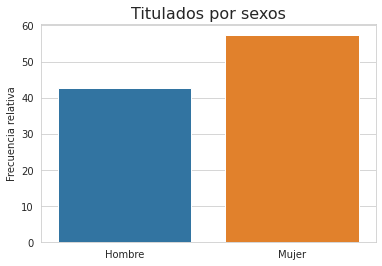

In [10]:
# Distribución de encuestados por sexos: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(6,4))

sns.barplot(data=sexos,x=sexos.index,y='sexo',palette='tab10')
ax.set_xticklabels([D_dicc['sexo'][float(tick.get_text())] for tick in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Titulados por sexos', fontsize=16)
#sns.despine()

fig.savefig('img/titulados_sexos.png',dpi=400)
plt.show()

# Tipo de formación

## Universidades públicas y privadas

In [11]:
# Diccionario de códigos de tipo de centros:
D_dicc['tipo_centro']=dict(zip(df['tipo_centro'].unique(),df['tipo_centro_'].unique()))

In [12]:
centros=pd.DataFrame(df['tipo_centro'].value_counts(normalize=True))
centros['tipo_centro']=(centros['tipo_centro']*100).round(2)
centros

,tipo_centro
1,83.95
0,16.05


## Enseñanza presencial y a distancia

In [13]:
# Diccionario de códigos de tipo de docencia:
D_dicc['tipo_docencia']=dict(zip(df['tipo_docencia'].unique(),df['tipo_docencia_'].unique()))

In [14]:
docencia=pd.DataFrame(df['tipo_docencia'].value_counts(normalize=True))
docencia['tipo_docencia']=(docencia['tipo_docencia']*100).round(2)
docencia

,tipo_docencia
0.0,92.11
1.0,7.89


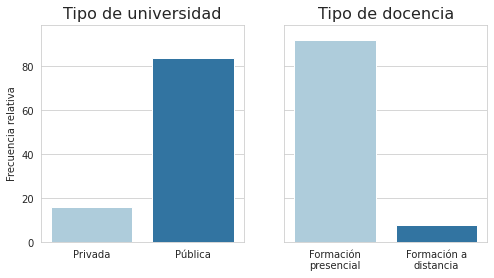

In [15]:
# Tipo de universidad y docencia: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2,figsize=(8,4))

sns.barplot(ax=ax[0],data=centros,x=centros.index,y='tipo_centro',palette='Paired')
ax[0].set_xticklabels([D_dicc['tipo_centro'][float(tick.get_text())] for tick in ax[0].get_xticklabels()])
ax[0].set_xticklabels([tick.get_text()[:-1]+'a' for tick in ax[0].get_xticklabels()])
ax[0].set_xlabel('')
ax[0].set_ylabel('Frecuencia relativa')
ax[0].set_ylim(0,99)
ax[0].set_title('Tipo de universidad', fontsize=16)



sns.barplot(ax=ax[1],data=docencia,x=docencia.index,y='tipo_docencia',palette='Paired')
ax[1].set_xticklabels([D_dicc['tipo_docencia'][float(tick.get_text())] for tick in ax[1].get_xticklabels()])
ax[1].set_xticklabels([textwrap.fill(tick.get_text(),12) for tick in ax[1].get_xticklabels()])
ax[1].tick_params(left=False,labelleft=False)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,99)
ax[1].set_title('Tipo de docencia', fontsize=16)

fig.savefig('img/tipos_universidad.png',dpi=400)
plt.show()

# Distribución de encuestados según discapacidad

In [16]:
D_dicc['discapacidad']=dict(zip(df['discapacidad'].unique(),df['discapacidad_'].unique()))

discapacidad=pd.DataFrame(df['discapacidad'].value_counts(normalize=True))
discapacidad['discapacidad']=(discapacidad['discapacidad']*100).round(2)
discapacidad

,discapacidad
0,98.93
1,1.07


In [17]:
def df_histograma(data,ref,criterio,umbral=0):
    """ Devuelve un histograma de frecuencias relativas (dataframe) de los datos de data agrupados de acuerdo con 
    las columnas en la lista ref según los valores de la columna criterio 
    Es equivalente a data[ref+[criterio]].groupby(ref, as_index=False).value_counts(normalize=True) si esta 
    instrucción fuera legítima.
    El argumento umbral establece una frecuencia mínima (en porcentaje) por debajo de la cual se omiten los 
    resultados. 
    """
    
    if type(ref)!=list: ref=[ref]
    
    aux_totales=data[ref+[criterio]].groupby(ref).agg(['count'])
    aux_totales.columns=aux_totales.columns.to_flat_index()
    aux_totales.rename(columns={aux_totales.columns[-1]:'total'},inplace=True)
    hist=data[ref+[criterio]].merge(aux_totales,left_on=ref,right_on=ref)

    # Frecuencias relativas:
    aux_fr=hist[ref+[criterio]].groupby(ref).agg(['value_counts'])
    aux_fr.columns=aux_fr.columns.to_flat_index()
    aux_fr.rename(columns={aux_fr.columns[-1]:'fr'},inplace=True)
    hist=hist.merge(aux_fr,left_on=ref+[criterio],right_on=ref+[criterio])
    hist.drop_duplicates(inplace=True)
    hist['fr']=(hist['fr'].div(hist['total']))*100
    hist=hist[hist['fr']>=umbral]
    hist.sort_values(by='fr',ascending=False,inplace=True)
    hist.reset_index(drop=True,inplace=True)

    return hist

In [18]:
discapacidad_centro=df_histograma(df,ref='discapacidad',criterio='tipo_centro_')
discapacidad_centro

,discapacidad,tipo_centro_,total,fr
0,1,Público,790,85.189873
1,0,Público,72723,83.932181
2,0,Privado,72723,16.067819
3,1,Privado,790,14.810127


In [19]:
discapacidad_docencia=df_histograma(df,ref='discapacidad',criterio='tipo_docencia_')
discapacidad_docencia

,discapacidad,tipo_docencia_,total,fr
0,0,Formación presencial,42632,92.179583
1,1,Formación presencial,502,86.454183
2,1,Formación a distancia,502,13.545817
3,0,Formación a distancia,42632,7.820417


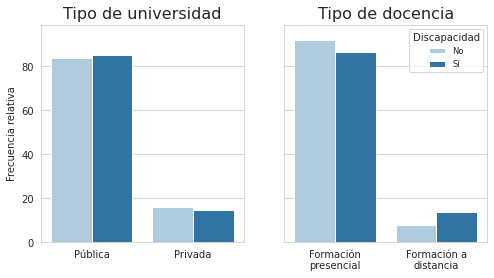

In [20]:
# Tipo de universidad y docencia según discapacidad: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2,figsize=(8,4))

sns.barplot(ax=ax[0],data=discapacidad_centro,x='tipo_centro_',y='fr',hue='discapacidad',
            palette='Paired')
ax[0].set_xticklabels([tick.get_text()[:-1]+'a' for tick in ax[0].get_xticklabels()])
ax[0].set_xlabel('')
ax[0].set_ylabel('Frecuencia relativa')
ax[0].set_ylim(0,99)
ax[0].set_title('Tipo de universidad', fontsize=16)
ax[0].legend_.remove()


sns.barplot(ax=ax[1],data=discapacidad_docencia,x='tipo_docencia_',y='fr',hue='discapacidad',palette='Paired')
ax[1].set_xticklabels([textwrap.fill(tick.get_text(),12) for tick in ax[1].get_xticklabels()])
ax[1].tick_params(left=False,labelleft=False)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,99)
ax[1].set_title('Tipo de docencia', fontsize=16)
handles,labels=ax[1].get_legend_handles_labels()
labels=[D_dicc['discapacidad'][int(label)] for label in labels]
ax[1].legend(title='Discapacidad',handles=handles,labels=labels,fontsize='small')

fig.savefig('img/discapacidad_tipo_universidad.png',dpi=400)
plt.show()

# Distribución de encuestados por títulos y familias de estudios 

### Distribución de encuestados por títulos

In [21]:
# Auxiliar para cálculo de distribución de encuestados para cada título: 
tts=pd.DataFrame(df['titulo_ppal_'].value_counts())
tts.reset_index(inplace=True)
tts.rename(columns={'index':'título','titulo_ppal_':'Núm. titulados encuestados'},inplace=True)
tts.head(6)

,título,Núm. titulados encuestados
0,Grado Administración y empresa,3042
1,Grado Derecho,2923
2,Grado Enfermería,2851
3,Grado Educación primaria,2586
4,Grado Educación infantil,2481
5,Grado Informática,2372


In [22]:
# Títulos con más de 2000 encuestados: 
tts_2000=tts[tts['Núm. titulados encuestados']>=2000]
tts_2000.set_index('título',drop=True,inplace=True)
tts_2000

,Núm. titulados encuestados
título,
Grado Administración y empresa,3042
Grado Derecho,2923
Grado Enfermería,2851
Grado Educación primaria,2586
Grado Educación infantil,2481
Grado Informática,2372


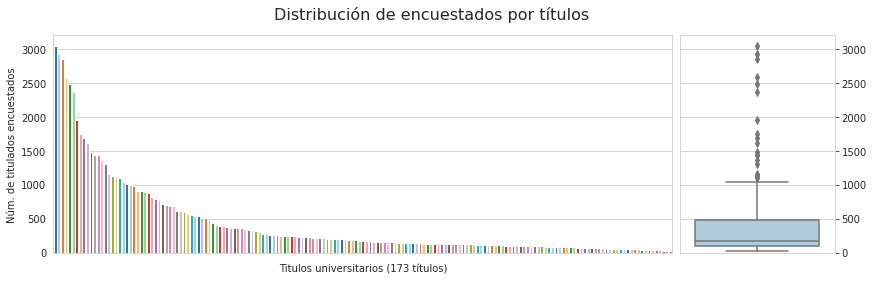

In [23]:
# Distribución de encuestados por títulos: 

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,4)) 
gs = gridspec.GridSpec(1,2, width_ratios=[4, 1]) 
fig.suptitle('Distribución de encuestados por títulos',fontsize=16)

ax=plt.subplot(gs[0])
sns.barplot(data=tts,x=tts.index,y='Núm. titulados encuestados',palette='tab20')
ax.set_xlabel('Titulos universitarios (173 títulos)')
ax.set_xticklabels(['']*len(tts['Núm. titulados encuestados']))
ax.set_ylim(0,3200)
ax.set_ylabel('Núm. de titulados encuestados')

ax=plt.subplot(gs[1])
sns.boxplot(data=tts,y='Núm. titulados encuestados',palette='Paired')
ax.set_ylim(0,3200)
ax.tick_params(right=True,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.subplots_adjust(wspace=0.02)

fig.savefig('img/distribucion_encuestados_titulo.png',dpi=400)
plt.show()

### Distribución de encuestados por familias de estudios

In [24]:
# Auxiliar para cálculo de distribución de encuestados por familias de estudios: 
fms=pd.DataFrame(df['familia_ppal_'].value_counts())
fms.reset_index(inplace=True)
fms.rename(columns={'index':'familia','familia_ppal_':'Núm. titulados encuestados'},inplace=True)
fms

,familia,Núm. titulados encuestados
0,"Negocios, administración y derecho",10851
1,Educación,10704
2,"Ingeniería, industria y construcción",10596
3,Salud y servicios sociales,10092
4,Artes y humanidades,7872
5,"Ciencias sociales, periodismo y documentación",7251
6,Ciencias,6341
7,Servicios,4160
8,Informática,2824
9,"Agricultura, ganadería, silvicultura, pesca y veterinaria",2822


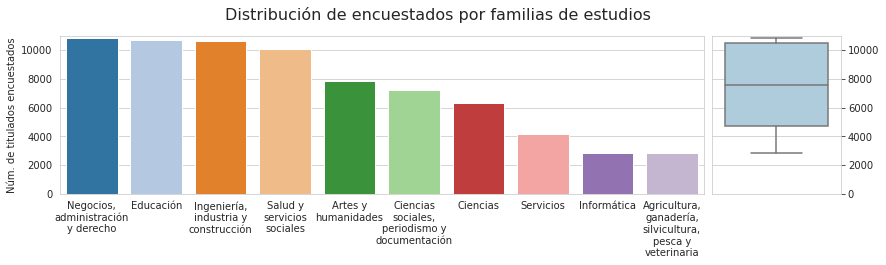

In [25]:
# Distribución de encuestados por familias de estudios: 

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,4)) 
gs = gridspec.GridSpec(2,2,height_ratios=[4, 1],width_ratios=[5,1]) 

ax=plt.subplot(gs[0,0])
fig.suptitle('Distribución de encuestados por familias de estudios',fontsize=16)
sns.barplot(data=fms,x='familia',y='Núm. titulados encuestados',palette='tab20')
ax.set_xlabel('')
ax.set_xticklabels(textwrap.fill(tick.get_text(),15) for tick in ax.get_xticklabels())
ax.set_ylim(0,11000)
ax.set_ylabel('Núm. de titulados encuestados')

ax=plt.subplot(gs[0,1])
sns.boxplot(data=fms,y='Núm. titulados encuestados',palette='Paired')
ax.set_ylim(0,11000)
ax.tick_params(right=True,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/encuestados_familias_estudios.png',dpi=400)
fig.subplots_adjust(wspace=0.02)
plt.show()

### Función df_histograma

In [26]:
def df_histograma(data,ref,criterio,umbral=0):
    """ Devuelve un histograma de frecuencias relativas (dataframe) de los datos de data agrupados de acuerdo con 
    las columnas en la lista ref según los valores de la columna criterio 
    Es equivalente a data[ref+[criterio]].groupby(ref, as_index=False).value_counts(normalize=True) si esta 
    instrucción fuera legítima.
    El argumento umbral establece una frecuencia mínima (en porcentaje) por debajo de la cual se omiten los 
    resultados. 
    """
    
    if type(ref)!=list: ref=[ref]
    
    aux_totales=data[ref+[criterio]].groupby(ref).agg(['count'])
    aux_totales.columns=aux_totales.columns.to_flat_index()
    aux_totales.rename(columns={aux_totales.columns[-1]:'total'},inplace=True)
    hist=data[ref+[criterio]].merge(aux_totales,left_on=ref,right_on=ref)

    # Frecuencias relativas:
    aux_fr=hist[ref+[criterio]].groupby(ref).agg(['value_counts'])
    aux_fr.columns=aux_fr.columns.to_flat_index()
    aux_fr.rename(columns={aux_fr.columns[-1]:'fr'},inplace=True)
    hist=hist.merge(aux_fr,left_on=ref+[criterio],right_on=ref+[criterio])
    hist.drop_duplicates(inplace=True)
    hist['fr']=(hist['fr'].div(hist['total']))*100
    hist=hist[hist['fr']>=umbral]
    hist.sort_values(by='fr',ascending=False,inplace=True)
    hist.reset_index(drop=True,inplace=True)

    return hist

## Presencia de hombres y mujeres en cada familia de estudios

In [27]:
familias_por_sexos=df_histograma(df,ref='familia_ppal_',criterio='sexo_').sort_values(by='familia_ppal_')
familias_por_sexos

,familia_ppal_,sexo_,total,fr
9,"Agricultura, ganadería, silvicultura, pesca y veterinaria",Mujer,2822,50.637845
10,"Agricultura, ganadería, silvicultura, pesca y veterinaria",Hombre,2822,49.362155
14,Artes y humanidades,Hombre,7872,39.430894
5,Artes y humanidades,Mujer,7872,60.569106
12,Ciencias,Hombre,6341,43.873206
7,Ciencias,Mujer,6341,56.126794
15,"Ciencias sociales, periodismo y documentación",Hombre,7251,38.256792
4,"Ciencias sociales, periodismo y documentación",Mujer,7251,61.743208
1,Educación,Mujer,10704,75.355007
18,Educación,Hombre,10704,24.644993


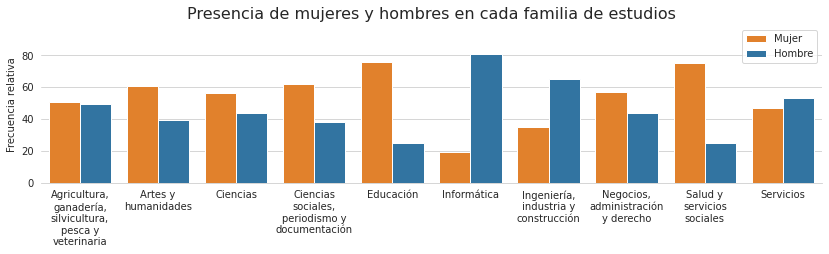

In [28]:
# Presencia de hombres y mujeres en cada familia de estudios: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(14,4))
gs = gridspec.GridSpec(2,1, height_ratios=[4, 1]) 

paleta=sns.color_palette('tab10').as_hex()
paleta=[paleta[1],paleta[0]]

ax=plt.subplot(gs[0])
sns.barplot(data=familias_por_sexos,x='familia_ppal_',y='fr',hue='sexo_',palette=paleta)
ax.set_xlabel('')
ax.set_xticklabels(textwrap.fill(tick.get_text(),15) for tick in ax.get_xticklabels())
ax.set_ylim(0,99)
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Presencia de mujeres y hombres en cada familia de estudios',fontsize=16)
ax.legend()

sns.despine(right=True,left=True,top=True)

fig.savefig('img/familias_estudios_sexos.png',dpi=400)
plt.show()

# Distribución de encuestados por situación laboral

In [29]:
# Diccionario de códigos de sit_lab
D_dicc['sit_lab']=dict(zip(df['sit_lab'].unique(),df['sit_lab_'].unique()))

In [30]:
sit_lab=pd.DataFrame(df['sit_lab'].value_counts(normalize=True))
sit_lab['sit_lab']=(sit_lab['sit_lab']*100).round(2)
sit_lab

,sit_lab
1.0,81.46
2.0,12.07
3.0,6.47


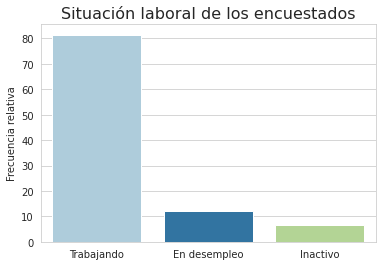

In [31]:
# Distribución de encuestados por situación laboral: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(6,4))

sns.barplot(data=sit_lab,x=sit_lab.index,y='sit_lab',palette='Paired')
ax.set_xticklabels([D_dicc['sit_lab'][float(tick.get_text())] for tick in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Situación laboral de los encuestados', fontsize=16)

fig.savefig('img/situacion_laboral.png',dpi=400)
plt.show()

## Situación laboral por sexos

In [32]:
lab_por_sexos=df_histograma(df,ref='sexo_',criterio='sit_lab').sort_values(by='sit_lab')
lab_por_sexos

,sexo_,sit_lab,total,fr
0,Hombre,1.0,31286,83.302436
1,Mujer,1.0,42227,80.102778
2,Mujer,2.0,42227,13.031946
3,Hombre,2.0,31286,10.771591
4,Mujer,3.0,42227,6.865276
5,Hombre,3.0,31286,5.925973


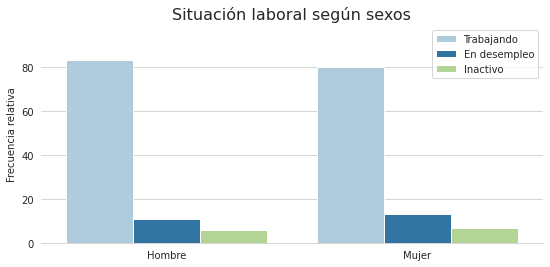

In [33]:
# Situación laboral por sexos: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(9,4))


sns.barplot(data=lab_por_sexos,x='sexo_',y='fr',hue='sit_lab',palette='Paired')
ax.set_xlabel('')
ax.set_ylim(0,99)
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Situación laboral según sexos',fontsize=16)
handles,labels=ax.get_legend_handles_labels()
labels=[D_dicc['sit_lab'][float(label)] for label in labels]
ax.legend(handles=handles,labels=labels)

fig.savefig('img/situacion_laboral_sexos.png',dpi=400)
sns.despine(right=True,left=True,top=True)
plt.show()

## Situación laboral según discapacidad

In [34]:
lab_por_discapacidad=df_histograma(df,ref='discapacidad',criterio='sit_lab').sort_values(by='sit_lab')
lab_por_discapacidad

,discapacidad,sit_lab,total,fr
0,0,1.0,72723,81.590418
1,1,1.0,790,69.873418
3,1,2.0,790,14.556962
4,0,2.0,72723,12.042958
2,1,3.0,790,15.569620
5,0,3.0,72723,6.366624


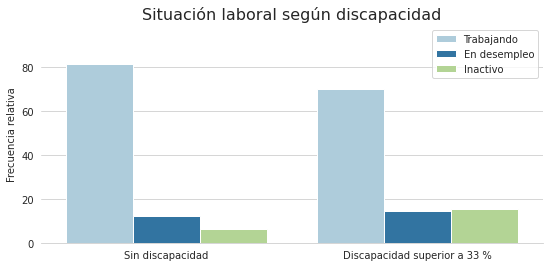

In [35]:
# Situación laboral por sexos: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(9,4))

sns.barplot(data=lab_por_discapacidad,x='discapacidad',y='fr',hue='sit_lab',palette='Paired')
ax.set_xlabel('')
ax.set_ylim(0,99)
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Situación laboral según discapacidad',fontsize=16)
D_aux={'0':'Sin discapacidad','1':'Discapacidad superior a 33 %'}
ax.set_xticklabels(D_aux[tick.get_text()] for tick in ax.get_xticklabels())

handles,labels=ax.get_legend_handles_labels()
labels=[D_dicc['sit_lab'][float(label)] for label in labels]
ax.legend(handles=handles,labels=labels)

fig.savefig('img/situacion_laboral_discapacidad.png',dpi=400)
sns.despine(right=True,left=True,top=True)
plt.show()

# Distribución de encuestados ocupados por profesiones

In [36]:
# Auxiliar para cálculo de distribución de encuestados por ocupaciones: 
ocs=pd.DataFrame(df['ocupacion_'].value_counts())
ocs.reset_index(inplace=True)
ocs.rename(columns={'index':'ocupación','ocupacion_':'Núm. profesionales'},inplace=True)
ocs

,ocupación,Núm. profesionales
0,Profesionales de la enseñanza,9809
1,"Profesionales de las ciencias, matemáticas e ingeniería",7794
2,Profesionales sanitarios,7568
3,"Expertos en gestión, finanzas, comercio, etc",2931
4,"Empleados servicios financieros, contables y de apoyo",2531
...,...,...
57,Montadores y ensambladores en fábricas,23
58,Ayudantes de preparación de alimentos,23
59,Empleados domésticos,20
60,Trabajadores cualificados act. agropecuaria,16


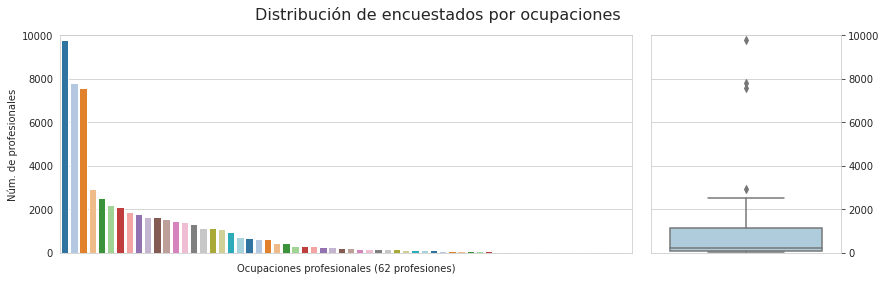

In [37]:
# Distribución de ocupaciones: 

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,4)) 
gs = gridspec.GridSpec(1,2, width_ratios=[3, 1]) 
fig.suptitle('Distribución de encuestados por ocupaciones',fontsize=16)

ax=plt.subplot(gs[0])
sns.barplot(data=ocs,x=ocs.index,y='Núm. profesionales',palette='tab20')
ax.set_xlabel('Ocupaciones profesionales (62 profesiones)')
ax.set_xticklabels(['']*len(ocs['Núm. profesionales']))
ax.set_ylim(0,10000)
ax.set_ylabel('Núm. de profesionales')

ax=plt.subplot(gs[1])
sns.boxplot(data=ocs,y='Núm. profesionales',palette='Paired')
ax.set_ylim(0,10000)
ax.tick_params(right=True,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/distribucion_encuestados_ocupaciones.png',dpi=400)
fig.subplots_adjust(wspace=0.05)
plt.show()

## Clasificación reducida de ocupaciones

Clasificación de ocupaciones con epígrafe 'otras' para profesiones no predecibles por el modelo de clasificación (regresión logística) propuesto

In [38]:
# Diccionario de ocupaciones reducido: 

df_ocupaciones_reducido=pd.read_csv('data/D_ocupaciones_reducido.csv',index_col=0)
D_ocupaciones_reducido=dict(zip(df_ocupaciones_reducido.index,\
                                df_ocupaciones_reducido[df_ocupaciones_reducido.columns[0]]))

In [39]:
D_ocupaciones_reducido

{22.0: 'Profesionales de la enseñanza',
 23.0: 'Profesionales de la eduación especial y no reglada',
 999.0: 'Otras',
 44.0: 'Telefonista, recepcionista, telefonista, agencias de viaje, etc',
 26.0: 'Expertos en gestión, finanzas, comercio, etc',
 28.0: 'Profesionales de las ciencias sociales',
 33.0: 'Técnicos sanitarios y laboratorio',
 38.0: 'Técnicos TI',
 37.0: 'Profesionales de apoyo servicios jurídicos, socio-culturales, deportivos',
 21.0: 'Profesionales sanitarios',
 59.0: 'Trabajadores protección y seguridad',
 41.0: 'Empleados servicios financieros, contables y de apoyo',
 24.0: 'Profesionales de las ciencias, matemáticas e ingeniería',
 25.0: 'Profesionales del derecho',
 29.0: 'Profesionales de la cultura y el espectáculo',
 27.0: 'Profesionales TI',
 31.0: 'Técnicos ciencias e ingenierías'}

In [40]:
# Columna de ocupaciones según clasificación reducida: 
# Códigos numéricos: 
df['ocupacionR']=df['ocupacion'][df['ocupacion'].notna()]\
                .mask(~df['ocupacion'].isin(D_ocupaciones_reducido.keys()),999)
# Valores literales: 
df['ocupacionR_']=df['ocupacionR'].replace(D_ocupaciones_reducido)

In [41]:
# Actualización dataframe de ocupados 
df_oc=df[df['ocupacion'].notna()]

In [42]:
# Ocupaciones en epígrafe 'Otras':
df_oc['ocupacion_'][~df_oc['ocupacion_'].isin(D_ocupaciones_reducido.values())].unique().tolist()

['Otros empleados administrativos con atención al público',
 'Trabajadores servicios personales',
 'Peones de transporte, descargadores y reponedores',
 'Empleados bibliotecas, correos, etc',
 'Asalariados servicios de restauración',
 'Trabajadores servicios de cuidados de salud',
 'Gerentes hostelería y comercio',
 'Dependientes de comercio',
 'Representantes e intermediarios',
 'Directores producción y operaciones',
 'Trabajadores servicios de cuidados no de salud',
 'Profesionales de apoyo a la gestión administrativa',
 'Empleados administrativos sin atención al público',
 'Personal de limpieza de establecimientos y vehículos',
 'Directores Admón y comerciales',
 'Peones de industrias manufactureras',
 'Política y dirección Admón Pública',
 'Trabajadores especializados electricidad y electrotecnología',
 'Recogedores residuos urbanos y ocupaciones elementales servicios',
 'Conductores vehículos transporte urbano o carretera',
 'Gerentes en servicios excepto hostelería y comercio',
 

## Distribución de encuestados ocupados por profesiones (clasificación reducida)

In [43]:
# Auxiliar para cálculo de distribución de encuestados por ocupaciones: 
ocsR=pd.DataFrame(df['ocupacionR_'].value_counts())
ocsR.reset_index(inplace=True)
ocsR.reset_index(inplace=True,drop=False)
ocsR.rename(columns={'index':'ocupaciónR_','ocupacionR_':'Núm. profesionales'},inplace=True)
ocsR

,level_0,ocupaciónR_,Núm. profesionales
0,0,Otras,13211
1,1,Profesionales de la enseñanza,9809
2,2,"Profesionales de las ciencias, matemáticas e ingeniería",7794
3,3,Profesionales sanitarios,7568
4,4,"Expertos en gestión, finanzas, comercio, etc",2931
5,5,"Empleados servicios financieros, contables y de apoyo",2531
6,6,Profesionales de las ciencias sociales,2200
7,7,Técnicos ciencias e ingenierías,2105
8,8,Profesionales TI,1866
9,9,Profesionales de la eduación especial y no reglada,1768


In [44]:
# Auxiliar (ocupacionesR ordenadas por número de titulados):
D_ocsR=dict(zip(ocsR['level_0'].unique(),ocsR['ocupaciónR_'].unique()))

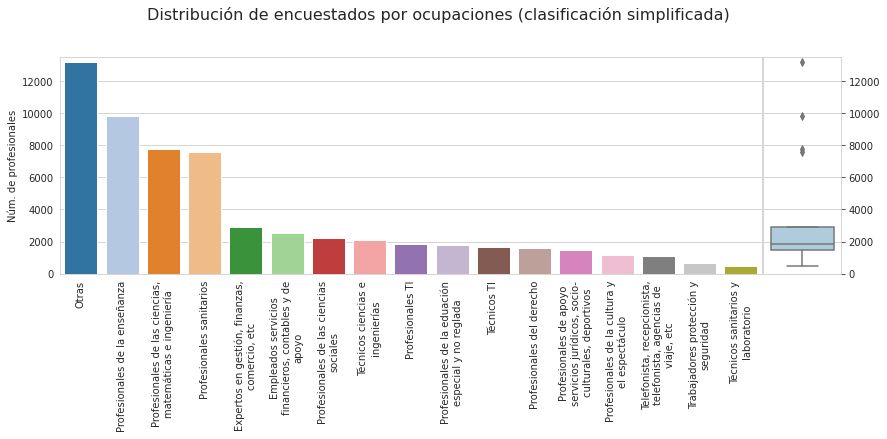

In [45]:
# Distribución de ocupaciones: 

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2,2, width_ratios=[9, 1],height_ratios=[5,3]) 
fig.suptitle('Distribución de encuestados por ocupaciones (clasificación simplificada)',fontsize=16)

ax=plt.subplot(gs[0,0])
sns.barplot(data=ocsR,x='level_0',y='Núm. profesionales',palette='tab20')
ax.set_xlabel('')
x_ticklabels=[D_ocsR[int(tick.get_text())] for tick in ax.get_xticklabels()]
x_ticklabels=[textwrap.fill(tick,30) for tick in x_ticklabels]
ax.set_xticklabels(x_ticklabels,rotation=90)
ax.set_ylim(0,13500)
ax.set_ylabel('Núm. de profesionales')

ax=plt.subplot(gs[0,1])
sns.boxplot(data=ocsR,y='Núm. profesionales',palette='Paired')
ax.set_ylim(0,13500)
ax.tick_params(right=True,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/distribucion_encuestados_ocupacionesR.png',dpi=400)
fig.subplots_adjust(wspace=0.005)
plt.show()

# Sueldos medianos y medios

La encuesta informa de sueldos netos mensuales agrupados en intervalos. 

El intervalo más alto de sueldos no está acotado superiormente. 

Para el cálculo de sueldos medianos y medios, se imputa una cota superior de 4000 € mensuales netos al intervalo de sueldos más altos. Así, la amplitud del último intervalo es el doble que la de los intervalos anteriores. 

In [46]:
# Columna auxiliar para cálculo de sueldos medianos: extremo superior de intervalos

D_sld_upper={1:700,2:1000,3:1500,4:2000,5:2500,6:3000,7:4000}
df['sld_upper']=df['sueldo'].replace(D_sld_upper)

In [47]:
# Columna auxiliar para cálculo de sueldos medianos: amplitud de intervalos

D_sld_amplitud={1:700,2:300,3:500,4:500,5:500,6:500,7:1000}
df['sld_amplitud']=df['sueldo'].replace(D_sld_amplitud)

In [48]:
# Columna auxiliar para el cálculo de sueldos medios: marcas de clase

df['sld_marca']=df['sld_upper']-df['sld_amplitud']/2

In [49]:
# Actualización df solo ocupados: 
df_oc=df[df['ocupacion'].notna()]

In [50]:
df[['sueldo','sueldo_','sld_upper','sld_amplitud','sld_marca']].sort_values(by='sueldo').drop_duplicates()

,sueldo,sueldo_,sld_upper,sld_amplitud,sld_marca
14952,1.0,Menos de 700 euros,700.0,700.0,350.0
18954,2.0,De 700 a 999 euros,1000.0,300.0,850.0
17009,3.0,De 1.000 a 1.499 euros,1500.0,500.0,1250.0
36803,4.0,De 1.500 a 1.999 euros,2000.0,500.0,1750.0
42516,5.0,De 2.000 a 2.499 euros,2500.0,500.0,2250.0
42487,6.0,De 2.500 a 2.999 euros,3000.0,500.0,2750.0
31467,7.0,De 3.000 euros en adelante,4000.0,1000.0,3500.0
4,NaN,NaN,NaN,NaN,NaN


### Función sueldo_mediano

In [51]:
def sueldo_mediano(data,ref,totales=False):
    
    """ Calcula el sueldo mediano (procedimiento de calculo de mediana para datos agrupados en intervalos) 
    para los encuestados agrupados por las columnas especificadas en el argumento 'ref'. 
    
    El intervalo superior de la variable sueldo es no acotado. Se ha fijado su amplitud en el doble de la amplitud
    más frecuente. Así, la cota superior para el sueldo mensual más alto se establece en 4000 € mensuales netos. 
    """
    
    if type(ref)!=list: ref=[ref]
    data=data[ref+['sld_upper','sld_amplitud']]
    
    # Frecuencias relativas:
    aux_fr=df_histograma(data=data,ref=ref,criterio='sld_upper')
    aux_fr['fr']=aux_fr['fr']/100
    
    
    merge_on=ref+['sld_upper']
    out=data.merge(aux_fr,left_on=merge_on,right_on=merge_on)
    out.drop_duplicates(inplace=True)
    
    # Orden según sueldo: 
    out.sort_values(by='sld_upper',inplace=True)
    
    # Frecuencias acumuladas: 
    out['fr cum']=out[ref+['fr']].groupby(ref).cumsum()
    
    # Frecuencia acumulada anterior: 
    out['fr cum-1']=out['fr cum']-out['fr']
    
    # Intervalo mediano: 
    out=out[out['fr cum']>=0.5]
    out.drop_duplicates(subset=ref,keep='first',inplace=True)
    
    # Sueldo mediano (=upper anterior+amplitud*(0.5-fr acum. anterior)/fr): 
    out['sueldo mensual mediano']=out['sld_upper']-out['sld_amplitud']\
                         +out['sld_amplitud']*(0.5-out['fr cum-1'])/out['fr'] 
    
    for col in ['sld_upper','sld_amplitud','fr','fr cum','fr cum-1']:
        del out[col]
    if totales==False: del out['total']
        
    out.reset_index(drop=True,inplace=True)
    out.sort_values(by=ref,inplace=True)
    
    return out

## Sueldos medianos por ocupaciones (clasificación simplificada)

In [52]:
sueldo_mediano_oc=sueldo_mediano(df_oc,ref='ocupacionR_',totales=True)
sueldo_mediano_oc.sort_values(by='sueldo mensual mediano',inplace=True)
sueldo_mediano_oc.reset_index(inplace=True,drop=True)
sueldo_mediano_oc.reset_index(inplace=True,drop=False)
sueldo_mediano_oc

,index,ocupacionR_,total,sueldo mensual mediano
0,0,"Profesionales de apoyo servicios jurídicos, socio-culturales, deportivos",864,1094.155844
1,1,"Telefonista, recepcionista, telefonista, agencias de viaje, etc",599,1151.098901
2,2,Profesionales de la eduación especial y no reglada,1053,1208.614865
3,3,Profesionales de la cultura y el espectáculo,716,1288.256228
4,4,Profesionales de las ciencias sociales,1336,1338.550247
5,5,Otras,8195,1378.123959
6,6,"Empleados servicios financieros, contables y de apoyo",996,1442.757009
7,7,Técnicos sanitarios y laboratorio,352,1450.617284
8,8,Técnicos ciencias e ingenierías,1471,1550.717213
9,9,Técnicos TI,811,1658.934708


In [53]:
# Diccionario de índices, ocupacionesR:
D_index_sld_mediano_ocR=dict(zip(sueldo_mediano_oc['index'].unique(),sueldo_mediano_oc['ocupacionR_'].unique()))

# Diccionario para orden de ocupaciones según sueldo mediano (ocupacionesR, índices): 
D_orden_sld_mediano_ocR=dict(zip(sueldo_mediano_oc['ocupacionR_'].unique(),sueldo_mediano_oc['index'].unique()))

In [54]:
# Reindex para incorporar frecuencias en boxplot: 
sueldo_mediano_oc_box=sueldo_mediano_oc.reindex(sueldo_mediano_oc.index.repeat(sueldo_mediano_oc['total']))

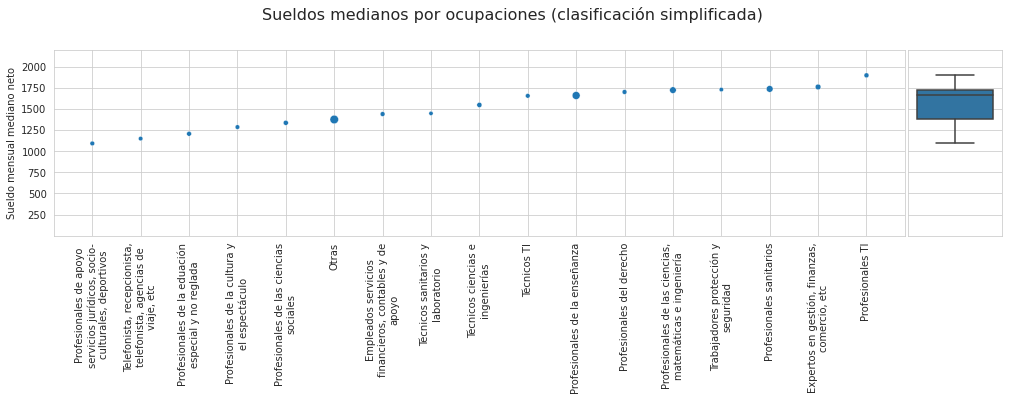

In [55]:
# Sueldos medianos por ocupaciones:

import matplotlib.ticker as ticker

sns.set_style('whitegrid')
fig= plt.figure(figsize=(17,6)) 
gs = gridspec.GridSpec(2,2, width_ratios=[9,1],height_ratios=[5,3]) 

fig.suptitle('Sueldos medianos por ocupaciones (clasificación simplificada)',fontsize=16)

ax=plt.subplot(gs[0,0])
sns.scatterplot(data=sueldo_mediano_oc,x='index',y='sueldo mensual mediano',
                palette='tab10',size='total',legend=False)
ax.set_xlabel('')
ax.set_ylim(1,2200)
ax.set_ylabel('Sueldo mensual mediano neto')

ax.set_xticks(np.arange(0,17,1))
x_ticklabels=[D_index_sld_mediano_ocR[tick] for tick in np.arange(0,17,1)]
x_ticklabels=[textwrap.fill(tick,30) for tick in x_ticklabels]
ax.set_xticklabels(x_ticklabels,rotation=90)

ax=plt.subplot(gs[0,1])
sns.boxplot(data=sueldo_mediano_oc_box,y='sueldo mensual mediano',palette='tab10')
ax.set_ylim(1,2200)
ax.tick_params(right=False,labelright=False,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/sueldos_medianos_ocupacionesR.png',dpi=400)
fig.subplots_adjust(wspace=0.005)
plt.show()

## Sueldos medianos por ocupaciones (clasificación simplificada) y sexos

In [56]:
sueldo_mediano_ocR_sexos=sueldo_mediano(df_oc,ref=['ocupacionR_','sexo_'],totales=True)
sueldo_mediano_ocR_sexos['ocupacionR_index']=sueldo_mediano_ocR_sexos['ocupacionR_']\
                                            .replace(D_orden_sld_mediano_ocR)
sueldo_mediano_ocR_sexos.sort_values(by='ocupacionR_index',inplace=True)
sueldo_mediano_ocR_sexos.head()

,ocupacionR_,sexo_,total,sueldo mensual mediano,ocupacionR_index
0,"Profesionales de apoyo servicios jurídicos, socio-culturales, deportivos",Hombre,420,1135.416667,0
11,"Profesionales de apoyo servicios jurídicos, socio-culturales, deportivos",Mujer,444,1057.926829,0
9,"Telefonista, recepcionista, telefonista, agencias de viaje, etc",Mujer,423,1122.928177,1
5,"Telefonista, recepcionista, telefonista, agencias de viaje, etc",Hombre,176,1206.521739,1
10,Profesionales de la eduación especial y no reglada,Mujer,718,1188.118812,2


In [57]:
# Reindex para incorporar frecuencias en boxplot: 
# Hombres:
sueldo_mediano_ocR_H=sueldo_mediano_ocR_sexos[sueldo_mediano_ocR_sexos['sexo_']=='Hombre']
sueldo_mediano_ocR_H=sueldo_mediano_ocR_H.reindex(sueldo_mediano_ocR_H.index.repeat(sueldo_mediano_ocR_H['total']))
# Mujeres:
sueldo_mediano_ocR_M=sueldo_mediano_ocR_sexos[sueldo_mediano_ocR_sexos['sexo_']=='Mujer']
sueldo_mediano_ocR_M=sueldo_mediano_ocR_M.reindex(sueldo_mediano_ocR_M.index.repeat(sueldo_mediano_ocR_M['total']))

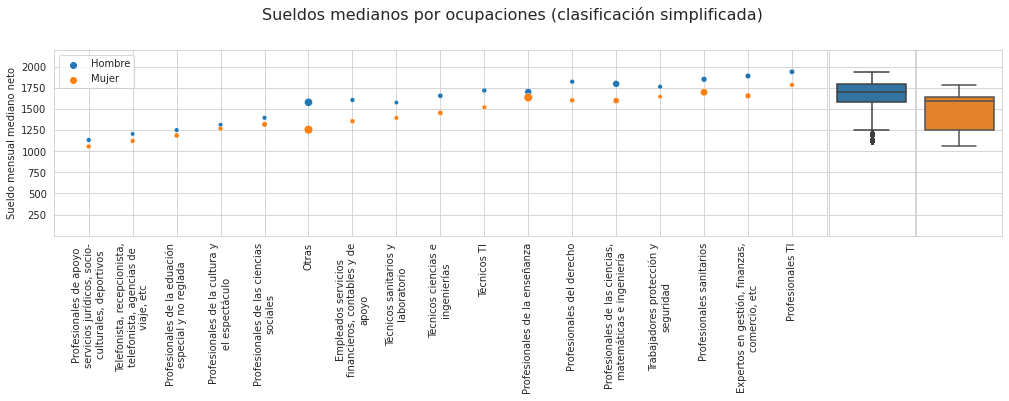

In [58]:
# Sueldos medianos por ocupaciones (clasificación simplificada) y sexos:

import matplotlib.ticker as ticker

sns.set_style('whitegrid')
fig= plt.figure(figsize=(17,6)) 
gs = gridspec.GridSpec(2,3, width_ratios=[9,1,1],height_ratios=[5,3]) 

fig.suptitle('Sueldos medianos por ocupaciones (clasificación simplificada)',fontsize=16)
paleta=sns.color_palette('tab10').as_hex()

ax=plt.subplot(gs[0,0])
sns.scatterplot(data=sueldo_mediano_ocR_sexos,x='ocupacionR_index',y='sueldo mensual mediano',hue='sexo_',
                palette='tab10',size='total')
ax.set_xlabel('')
ax.set_ylim(1,2200)
ax.set_ylabel('Sueldo mensual mediano neto')

ax.set_xticks(np.arange(0,17,1))
x_ticklabels=[D_index_sld_mediano_ocR[tick] for tick in np.arange(0,17,1)]
x_ticklabels=[textwrap.fill(tick,30) for tick in x_ticklabels]
ax.set_xticklabels(x_ticklabels,rotation=90)

handles, labels=ax.get_legend_handles_labels()
handles, labels=handles[1:3], labels[1:3]
ax.legend(handles=handles,labels=labels)

ax=plt.subplot(gs[0,1])
sns.boxplot(data=sueldo_mediano_ocR_H,y='sueldo mensual mediano',color=paleta[0])
ax.set_ylim(1,2200)
ax.tick_params(right=False,labelright=False,left=False,labelleft=False)
ax.set_ylabel('')

ax=plt.subplot(gs[0,2])
sns.boxplot(data=sueldo_mediano_ocR_M,y='sueldo mensual mediano',color=paleta[1])
ax.set_ylim(1,2200)
ax.tick_params(right=False,labelright=False,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/sueldos_medianos_ocupacionesR_sexos.png',dpi=400)
fig.subplots_adjust(wspace=0.005)
plt.show()

## Sueldos medianos por sexos

In [59]:
# Sueldos medianos según sexos: 

sueldo_mediano_sexos=sueldo_mediano(data=df_oc,ref=['sexo'])
sueldo_mediano_sexos

,sexo,sueldo mensual mediano
1,0,1694.947285
0,1,1475.445081


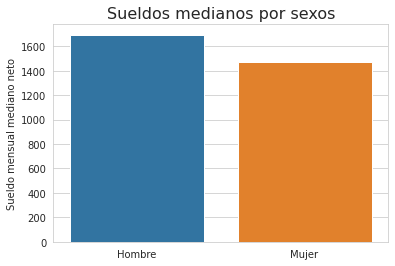

In [60]:
# Distribución de sueldos medianos por sexos: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(6,4))



sns.barplot(data=sueldo_mediano_sexos,x='sexo',y='sueldo mensual mediano',palette='tab10')
ax.set_xticklabels([D_dicc['sexo'][float(tick.get_text())] for tick in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel('Sueldo mensual mediano neto')
ax.set_title('Sueldos medianos por sexos', fontsize=16)

fig.savefig('img/sueldo_mediano_sexos.png',dpi=400)
plt.show()

## Sueldos medianos por ocupaciones y sexos

In [61]:
# Auxiliar para orden de ocupaciones según sueldo mediano sin distinguir por sexos:

sueldo_oc_medio=sueldo_mediano(data=df_oc,ref=['ocupacion'])
sueldo_oc_medio.sort_values(by=['sueldo mensual mediano'],inplace=True)
sueldo_oc_medio.reset_index(inplace=True,drop=True)
sueldo_oc_medio.reset_index(inplace=True,drop=False)
sueldo_oc_medio.head()

,index,ocupacion,sueldo mensual mediano
0,0,57.0,835.714286
1,1,55.0,880.882353
2,2,91.0,887.500000
3,3,92.0,897.368421
4,4,52.0,976.086957


In [62]:
# Diccionario para orden de ocupaciones según sueldo mediano: 

D_orden_sld_oc=dict(zip(sueldo_oc_medio['ocupacion'].unique(),sueldo_oc_medio['index'].unique()))

In [63]:
# Sueldos medianos por ocupaciones y sexos: 

sueldo_oc=sueldo_mediano(data=df_oc,ref=['ocupacion','sexo_'],totales=True)
sueldo_oc.sort_values(by=['sueldo mensual mediano'],inplace=True)
sueldo_oc['ocupacion_index']=sueldo_oc['ocupacion'].replace(D_orden_sld_oc)
sueldo_oc.sort_values(by='ocupacion_index',inplace=True)
sueldo_oc.head()

,ocupacion,sexo_,total,sueldo mensual mediano,ocupacion_index
74,57.0,Hombre,22,1111.111111,0.0
3,57.0,Mujer,140,812.500000,0.0
9,55.0,Mujer,63,875.000000,1.0
10,55.0,Hombre,20,925.000000,1.0
6,91.0,Mujer,11,887.500000,2.0


In [64]:
# Reindex para incorporar frecuencias en boxplot: 
# Hombres:
sueldo_oc_H=sueldo_oc[sueldo_oc['sexo_']=='Hombre']
sueldo_oc_H=sueldo_oc_H.reindex(sueldo_oc_H.index.repeat(sueldo_oc_H['total']))
# Mujeres:
sueldo_oc_M=sueldo_oc[sueldo_oc['sexo_']=='Mujer']
sueldo_oc_M=sueldo_oc_M.reindex(sueldo_oc_M.index.repeat(sueldo_oc_M['total']))

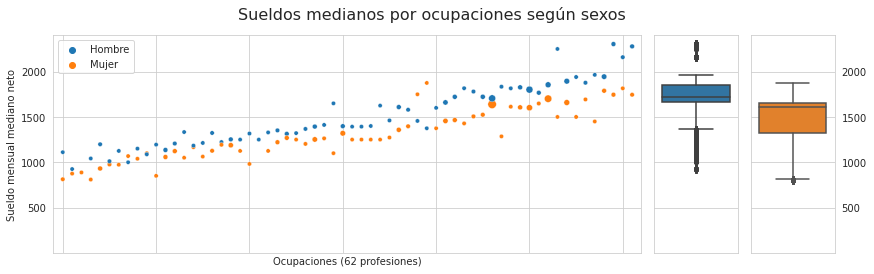

In [65]:
# Sueldos medianos por ocupaciones y sexos:

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,4)) 
gs = gridspec.GridSpec(1,3, width_ratios=[7,1,1]) 
fig.suptitle('Sueldos medianos por ocupaciones según sexos',fontsize=16)

paleta=sns.color_palette('tab10')

ax=plt.subplot(gs[0])
sns.scatterplot(data=sueldo_oc,x='ocupacion_index',y='sueldo mensual mediano',
                hue='sexo_',palette='tab10',size='total')
ax.set_xlabel('Ocupaciones (62 profesiones)')
ax.set_ylim(1,2400)
ax.set_xlim(sueldo_oc['ocupacion_index'].min()-1,sueldo_oc['ocupacion_index'].max()+1)
ax.set_ylabel('Sueldo mensual mediano neto')
ax.tick_params(bottom=False,labelbottom=False)
handles, labels=ax.get_legend_handles_labels()
handles, labels=handles[1:3], labels[1:3]
ax.legend(handles=handles,labels=labels)

ax=plt.subplot(gs[1])
sns.boxplot(data=sueldo_oc_H,y='sueldo mensual mediano',color=paleta.as_hex()[0])
ax.set_ylim(1,2400)
ax.tick_params(right=False,labelright=False,left=False,labelleft=False)
ax.set_ylabel('')

ax=plt.subplot(gs[2])
sns.boxplot(data=sueldo_oc_M,y='sueldo mensual mediano',color=paleta.as_hex()[1])
ax.set_ylim(1,2400)
ax.tick_params(right=False,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/sueldos_medianos_ocupaciones.png',dpi=400)
fig.subplots_adjust(wspace=0.05)
plt.show()

In [66]:
# Excepciones a brecha salarial por ocupación: 

excepcion_brecha=sueldo_oc.sort_values(by=['sueldo mensual mediano'])\
                          .drop_duplicates(subset=['ocupacion'],keep='last')
excepcion_brecha=excepcion_brecha[excepcion_brecha['sexo_']=='Mujer']
excepcion_brecha

,ocupacion,sexo_,total,sueldo mensual mediano,ocupacion_index
6,91.0,Mujer,11,887.500000,2.0
38,93.0,Mujer,19,1068.181818,7.0
47,98.0,Mujer,28,1100.000000,9.0
101,75.0,Mujer,6,1750.000000,38.0
87,62.0,Mujer,5,1875.000000,39.0


In [67]:
# Diccionario de ocupaciones: 
D_dicc['ocupacion']=dict(zip(df['ocupacion'].unique(),df['ocupacion_'].unique()))

In [68]:
excepcion_brecha['ocupacion'].replace(D_dicc['ocupacion'],inplace=True)
excepcion_brecha

,ocupacion,sexo_,total,sueldo mensual mediano,ocupacion_index
6,Empleados domésticos,Mujer,11,887.500000,2.0
38,Ayudantes de preparación de alimentos,Mujer,19,1068.181818,7.0
47,"Peones de transporte, descargadores y reponedores",Mujer,28,1100.000000,9.0
101,Trabajadores especializados electricidad y electrotecnología,Mujer,6,1750.000000,38.0
87,Trabajadores cualificados ganadería,Mujer,5,1875.000000,39.0


## Sueldos medianos por titulos y sexos

In [69]:
# Auxiliar para orden de títulos según sueldo mediano sin distinguir por sexos

sueldo_tt_medio=sueldo_mediano(data=df_oc,ref=['titulo_ppal'])
sueldo_tt_medio.sort_values(by=['sueldo mensual mediano'],inplace=True)
sueldo_tt_medio.reset_index(inplace=True,drop=True)
sueldo_tt_medio.reset_index(inplace=True,drop=False)
sueldo_tt_medio.head()

,index,titulo_ppal,sueldo mensual mediano
0,0,21301,1079.268293
1,1,21401,1102.941176
2,2,22201,1144.736842
3,3,213,1171.875000
4,4,91502,1177.419355


In [70]:
# Diccionario para orden de títulos según sueldo mediano: 

D_orden_sld_tt=dict(zip(sueldo_tt_medio['titulo_ppal'].unique(),sueldo_tt_medio['index'].unique()))

In [71]:
# Sueldos medianos por títulos y sexos: 

sueldo_tt=sueldo_mediano(data=df_oc,ref=['titulo_ppal','sexo_'],totales=True)
sueldo_tt.sort_values(by=['sueldo mensual mediano'],inplace=True)
sueldo_tt['titulo_ppal'].replace(D_orden_sld_tt,inplace=True)
sueldo_tt.sort_values(by='titulo_ppal',inplace=True)
sueldo_tt.head()

,titulo_ppal,sexo_,total,sueldo mensual mediano
83,0,Mujer,155,1055.000000
84,0,Hombre,83,1117.187500
63,1,Mujer,31,1057.692308
72,1,Hombre,10,1250.000000
64,2,Hombre,10,1214.285714


In [72]:
# Reindex para incorporar frecuencias en boxplot: 
# Hombres:
sueldo_tt_H=sueldo_tt[sueldo_tt['sexo_']=='Hombre']
sueldo_tt_H=sueldo_tt_H.reindex(sueldo_tt_H.index.repeat(sueldo_tt_H['total']))
# Mujeres:
sueldo_tt_M=sueldo_tt[sueldo_tt['sexo_']=='Mujer']
sueldo_tt_M=sueldo_tt_M.reindex(sueldo_tt_M.index.repeat(sueldo_tt_M['total']))

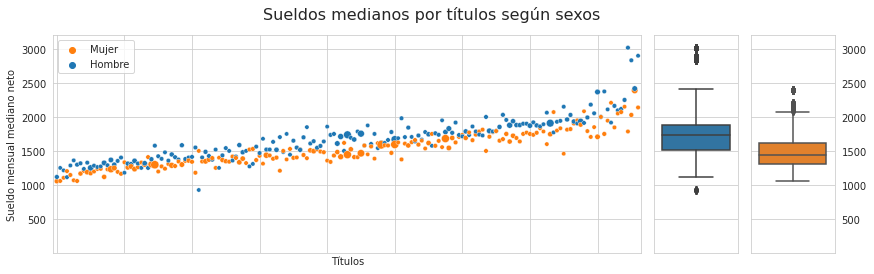

In [73]:
# Sueldos medianos por títulos y sexos:

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,4)) 
gs = gridspec.GridSpec(1,3, width_ratios=[7,1,1]) 
fig.suptitle('Sueldos medianos por títulos según sexos',fontsize=16)

paleta=sns.color_palette('tab10')
paleta=paleta.as_hex()[:2]
paleta_r=[paleta[1],paleta[0]]

ax=plt.subplot(gs[0])
sns.scatterplot(data=sueldo_tt,x='titulo_ppal',y='sueldo mensual mediano',hue='sexo_', size='total',
                palette=paleta_r)
ax.set_xlabel('Títulos')
ax.set_xlim(sueldo_tt['titulo_ppal'].min()-1,sueldo_tt['titulo_ppal'].max()+1)
ax.set_ylim(1,3200)
ax.set_ylabel('Sueldo mensual mediano neto')
ax.tick_params(bottom=False,labelbottom=False)
handles, labels=ax.get_legend_handles_labels()
handles, labels=handles[1:3], labels[1:3]
ax.legend(handles=handles,labels=labels)

ax=plt.subplot(gs[1])
sns.boxplot(data=sueldo_tt_H,y='sueldo mensual mediano',color=paleta[0])
ax.set_ylim(1,3200)
ax.tick_params(right=False,labelright=False,left=False,labelleft=False)
ax.set_ylabel('')

ax=plt.subplot(gs[2])
sns.boxplot(data=sueldo_tt_M,y='sueldo mensual mediano',color=paleta[1])
ax.set_ylim(1,3200)
ax.tick_params(right=False,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/sueldos_medianos_titulos.png',dpi=400)
fig.subplots_adjust(wspace=0.05)
plt.show()

## Sueldos medianos por titulos, ocupaciones y sexos

In [74]:
def lista_primos(n):
    """Devuelve una lista con los n primeros números primos
    """
    
    import numpy as np
    
    lista=[2,3]
    candidato=3
    while len(lista)<n:
        candidato=candidato+2
        prueba=0
        for divisor in [primo for primo in lista if primo<=np.sqrt(candidato)]:
            max_pruebas=len([primo for primo in lista if primo<=np.sqrt(candidato)])
            prueba=prueba+1
            if candidato%divisor==0: 
                break
            if prueba==max_pruebas: 
                lista.append(candidato)
        
    return lista[:n]

In [75]:
# Auxiliar para orden de títulos y ocupaciones según sueldo mediano sin distinguir por sexos

sueldo_tt_oc_medio=sueldo_mediano(data=df_oc,ref=['titulo_ppal','ocupacion'],totales=True)
sueldo_tt_oc_medio.sort_values(by=['sueldo mensual mediano'],inplace=True)

# Al menos un número n_min de observaciones: 
n_min=5
sueldo_tt_oc_medio=sueldo_tt_oc_medio[sueldo_tt_oc_medio['total']>=n_min]

sueldo_tt_oc_medio.reset_index(inplace=True,drop=True)
sueldo_tt_oc_medio.reset_index(inplace=True,drop=False)

# Se remplazan los códigos de titulo y de ocupación por números primos:
# (evita productos repetidos al crear códigos de titulo y ocupación combinados)

lista_primos_tt=lista_primos(sueldo_tt_oc_medio['titulo_ppal'].nunique())
D_tt_primos=dict(zip(sueldo_tt_oc_medio['titulo_ppal'].unique(),lista_primos_tt))
sueldo_tt_oc_medio['titulo_ppal'].replace(D_tt_primos,inplace=True)

# Códigos primos par ocupación a partir del último asignado a titulos: 
lista_primos_oc=lista_primos(sueldo_tt_oc_medio['titulo_ppal'].nunique()
                             +sueldo_tt_oc_medio['ocupacion'].nunique())\
                            [sueldo_tt_oc_medio['titulo_ppal'].nunique():]
D_oc_primos=dict(zip(sueldo_tt_oc_medio['ocupacion'].unique(),lista_primos_oc))
sueldo_tt_oc_medio['ocupacion'].replace(D_oc_primos,inplace=True)

# Se crean códigos de título y ocupación combinados (para orden de sueldos)
sueldo_tt_oc_medio['tt_oc']=sueldo_tt_oc_medio['titulo_ppal']*sueldo_tt_oc_medio['ocupacion']
sueldo_tt_oc_medio.tail()

,index,titulo_ppal,ocupacion,total,sueldo mensual mediano,tt_oc
1193,1193,587,1283.0,5,3166.666667,753121.0
1194,1194,193,1361.0,9,3250.000000,262673.0
1195,1195,751,1283.0,8,3333.333333,963533.0
1196,1196,929,1303.0,5,3375.000000,1210487.0
1197,1197,991,1303.0,5,3375.000000,1291273.0


In [76]:
# Comprobación (no hay códigos de título y ocupación repetidos)
sueldo_tt_oc_medio['tt_oc'].nunique() 

1198

In [77]:
# Diccionario para orden de títulos y ocupaciones (columna 'tt_oc') según sueldo mediano: 

D_orden_sld_tt_oc=dict(zip(sueldo_tt_oc_medio['tt_oc'].unique(),sueldo_tt_oc_medio['index'].unique()))

In [78]:
# Sueldos medianos por títulos y sexos: 

sueldo_tt_oc=sueldo_mediano(data=df_oc,ref=['titulo_ppal','ocupacion','sexo_'],totales=True)
sueldo_tt_oc.sort_values(by=['sueldo mensual mediano'],inplace=True)

# Recodificación títulos: 
sueldo_tt_oc['titulo_ppal'].replace(D_tt_primos,inplace=True)

# Recodificación ocupaciones: 
sueldo_tt_oc['ocupacion'].replace(D_oc_primos,inplace=True)

# Recodificación títulos y ocupaciones combinados: 
sueldo_tt_oc['tt_oc']=sueldo_tt_oc['titulo_ppal']*sueldo_tt_oc['ocupacion']
sueldo_tt_oc['tt_oc'].replace(D_orden_sld_tt_oc,inplace=True)
sueldo_tt_oc.sort_values(by='tt_oc',inplace=True)
sueldo_tt_oc

,titulo_ppal,ocupacion,sexo_,total,sueldo mensual mediano,tt_oc
26,2,1033.0,Mujer,3,350.0,0.0
8,2,1033.0,Hombre,2,350.0,0.0
232,3,1039.0,Hombre,2,700.0,1.0
173,3,1039.0,Mujer,3,350.0,1.0
113,5,1049.0,Hombre,2,350.0,2.0
...,...,...,...,...,...,...
5405,983,1361.0,Hombre,1,2250.0,1337863.0
1289,1019,1319.0,Mujer,1,1250.0,1344061.0
5855,991,1361.0,Hombre,1,2750.0,1348751.0
1888,997,1361.0,Hombre,1,1250.0,1356917.0


In [79]:
# Al menos n_min observaciones para cada sexo: 
sueldo_tt_oc=sueldo_tt_oc[sueldo_tt_oc['total']>=n_min]

In [80]:
# Reindex para incorporar frecuencias en boxplot: 
# Hombres:
sueldo_tt_oc_H=sueldo_tt_oc[sueldo_tt_oc['sexo_']=='Hombre']
sueldo_tt_oc_H=sueldo_tt_oc_H.reindex(sueldo_tt_oc_H.index.repeat(sueldo_tt_oc_H['total']))
# Mujeres:
sueldo_tt_oc_M=sueldo_tt_oc[sueldo_tt_oc['sexo_']=='Mujer']
sueldo_tt_oc_M=sueldo_tt_oc_M.reindex(sueldo_tt_oc_M.index.repeat(sueldo_tt_oc_M['total']))

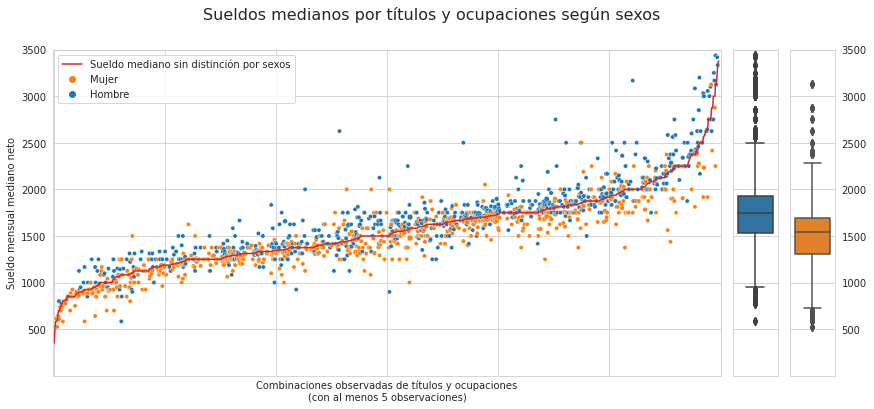

In [81]:
# Sueldos medianos por títulos y sexos:

sns.set_style('whitegrid')
fig= plt.figure(figsize=(14,6)) 
gs = gridspec.GridSpec(1,3, width_ratios=[15,1,1]) 
fig.suptitle('Sueldos medianos por títulos y ocupaciones según sexos',fontsize=16)

paleta=sns.color_palette('tab10')
paleta_r=[paleta[1],paleta[0]]

ax=plt.subplot(gs[0])
sns.scatterplot(data=sueldo_tt_oc,x='tt_oc',y='sueldo mensual mediano',hue='sexo_',palette=paleta_r,size='total')
sns.lineplot(data=sueldo_tt_oc_medio,x=sueldo_tt_oc_medio.index,y='sueldo mensual mediano',
             color=paleta[3],label='Sueldo mediano sin distinción por sexos')
x_label='Combinaciones observadas de títulos y ocupaciones\n\
(con al menos 5 observaciones)'
ax.set_xlabel(x_label)
ax.set_ylim(1,3500)
ax.set_xlim(sueldo_tt_oc['tt_oc'].min()-5,sueldo_tt_oc['tt_oc'].max()+5)
ax.set_ylabel('Sueldo mensual mediano neto')
ax.tick_params(bottom=False,labelbottom=False)
ax.legend(loc='upper left',ncol=3)
handles, labels=ax.get_legend_handles_labels()
handles, labels=[handles[0]]+handles[2:4], [labels[0]]+labels[2:4]
ax.legend(handles=handles,labels=labels,loc='upper left')

ax=plt.subplot(gs[1])
sns.boxplot(data=sueldo_tt_oc_H,y='sueldo mensual mediano',color=paleta[0])
ax.set_ylim(1,3500)
ax.tick_params(right=False,labelright=False,left=False,labelleft=False)
ax.set_ylabel('')

ax=plt.subplot(gs[2])
sns.boxplot(data=sueldo_tt_oc_M,y='sueldo mensual mediano',color=paleta[1])
ax.set_ylim(1,3500)
ax.tick_params(right=False,labelright=True,left=False,labelleft=False)
ax.set_ylabel('')

fig.savefig('img/sueldos_medianos_titulos_ocupaciones.png',dpi=400)
fig.subplots_adjust(wspace=0.05)
plt.show()

## Jornada laboral según sexos

In [82]:
# Jornada laboral por sexos: 
jornada=df_histograma(df_oc,ref='sexo_',criterio='jornada_')
jornada

,sexo_,jornada_,total,fr
0,Hombre,A tiempo completo,25983,87.888235
1,Mujer,A tiempo completo,33751,78.406566
2,Mujer,A tiempo parcial,33751,21.593434
3,Hombre,A tiempo parcial,25983,12.111765


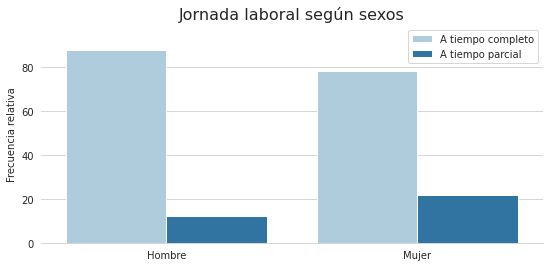

In [83]:
# Jornada laboral por sexos: 

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,figsize=(9,4))

sns.barplot(data=jornada,x='sexo_',y='fr',hue='jornada_',palette='Paired')
ax.set_xlabel('')
ax.set_ylim(0,99)
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Jornada laboral según sexos',fontsize=16)
ax.legend()

fig.savefig('img/jornada_laboral_sexos.png',dpi=400)
sns.despine(right=True,left=True,top=True)
plt.show()